# <center> San Francisco City Salaries (2011 - 2017) </center>

## <center> Data Analysis Project</center>
___

### <center> Introduction </center>

City of San Francisco, CA, has been popular among young professionals. Culture, nightlife, increase of tech hubs and tech related jobs has certainly had to have an impact on the employment and the salary data. Honestly, even I have personaly, once considered the possiblity of find a job in San Francisco and relocate there (I am living in the UK) as it always was in my bucket-list to visit. Once I have found out that you can access openly and freely San Francisco county salary data, I decided to take my Python and Data Analysis skills and put them to practice in analysis this data. 


### <center> Objectives </center>

* Provide exploratory data analysis on the San Francisco salaries data between 2011 - 2017 
* Provide insights on how salaries have changed in the country over time. 

** Libraries ** 
* Pandas and NumPy libraries will be used for data analysis, and 
* Matplotlib and Seaborn libraries for Visualisation. Finally,


### <center> References </center>

Data has been taken from <a href='https://transparentcalifornia.com/salaries/san-francisco/'> <b>Transparent California</b></a> website. Which is California's largest public pay and pension database.

Transparent California is provided by the Nevada Policy Research Institute as a public service to provide comprehensive and easily searchable information on the compensation of public employees in California.

____
# <center> READY ? Let's Dive In! </center>

In [2]:
# Importing libraries 

# data analysis libraries
import pandas as pd
import numpy as np

# data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# interactive visualisation libraries 
import plotly.plotly as py
import cufflinks as cf

cf.go_offline(True)

# importing check_output subprocess that allows to print local files.
from subprocess import check_output

# importing glob and os 
import glob, os

# Setting Matplotlib visualisations to be displayed in the IPython Notebook 
%matplotlib inline

In [3]:
# printing the local files that we will be working on.
print('Files in directory:\n')
print(check_output(['ls']).decode('utf8'))

Files in directory:

SF Salaries.ipynb
SFsalaries_1.ipynb
San Francisco Salary Data Analysis.ipynb
all-san-francisco-all.csv
san-francisco-2011.csv
san-francisco-2012.csv
san-francisco-2013.csv
san-francisco-2014.csv
san-francisco-2015.csv
san-francisco-2016.csv
san-francisco-2017.csv



In [4]:
# importing all the csv files and concatenating them all into a single Pandas DataFrame
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('','san-francisco*.csv'))),sort=True)

In [5]:
# printing the information summary about the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270573 entries, 0 to 38118
Data columns (total 12 columns):
Agency                  270573 non-null object
Base Pay                270573 non-null object
Benefits                270573 non-null object
Employee Name           270573 non-null object
Job Title               270573 non-null object
Notes                   0 non-null float64
Other Pay               270573 non-null object
Overtime Pay            270573 non-null object
Status                  119072 non-null object
Total Pay               270573 non-null float64
Total Pay & Benefits    270573 non-null float64
Year                    270573 non-null int64
dtypes: float64(3), int64(1), object(8)
memory usage: 26.8+ MB


In [6]:
# printing the describtive summary information of the dataset.
df.describe()

,Notes,Total Pay,Total Pay & Benefits,Year
count,0.0,270573.000000,270573.000000,270573.000000
mean,NaN,77492.395990,98966.541230,2014.097608
std,NaN,52401.256958,65379.902423,2.002397
min,NaN,-618.130000,-3628.780000,2011.000000
25%,NaN,37812.900000,47618.960000,2012.000000
50%,NaN,73697.010000,97767.580000,2014.000000
75%,NaN,109459.500000,139543.140000,2016.000000
max,NaN,567595.430000,666180.140000,2017.000000


In [7]:
# checking the missing values in the dataset.
print(df.isnull().sum())
print('-'*10)
print(df.isna().sum())
print('-'*10)

Agency                       0
Base Pay                     0
Benefits                     0
Employee Name                0
Job Title                    0
Notes                   270573
Other Pay                    0
Overtime Pay                 0
Status                  151501
Total Pay                    0
Total Pay & Benefits         0
Year                         0
dtype: int64
----------
Agency                       0
Base Pay                     0
Benefits                     0
Employee Name                0
Job Title                    0
Notes                   270573
Other Pay                    0
Overtime Pay                 0
Status                  151501
Total Pay                    0
Total Pay & Benefits         0
Year                         0
dtype: int64
----------


___
### <center> DATA CLEANING AREA </center>
___

In [8]:
# creating a copy of the original dataframe to work with.
salaries = df.copy(deep=True)

In [9]:
# removing the Notes column, as it does not contain any useful information that we could use.
salaries.drop('Notes',axis=1,inplace=True)

# fills missing values in Status column with the mode value of the Status column.
salaries['Status'].fillna(salaries['Status'].mode()[0],inplace=True)
    
# replacing the 'NaN' values in the Benefits column with zero.
salaries['Benefits'].fillna('0',inplace=True)


In [10]:
# creating a dictionary of of missing values which will replace any keys found in dataset with the key values.
missing_values = {
    'Not Provided': 'NaN',
    'Not provided': 'NaN',
    'null':'NaN',
}

# replacing missing values found by dictionary keys and replacing with dictionary values.
salaries.replace(missing_values,regex=True,inplace=True)

In [11]:
# creating a variable with the column names that will be converted to numeric dtypes.
columns_to_convert = ['Base Pay', 'Benefits','Other Pay','Overtime Pay']

# using apply method to convert object type columns to numeric type. 
salaries[columns_to_convert] = salaries[columns_to_convert].apply(pd.to_numeric, errors='coerce',axis=0)

In [12]:
# printing info summary to confirm data type conversion.
print(salaries.info())
salaries.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270573 entries, 0 to 38118
Data columns (total 11 columns):
Agency                  270573 non-null object
Base Pay                269967 non-null float64
Benefits                234413 non-null float64
Employee Name           270573 non-null object
Job Title               270573 non-null object
Other Pay               270572 non-null float64
Overtime Pay            270572 non-null float64
Status                  270573 non-null object
Total Pay               270573 non-null float64
Total Pay & Benefits    270573 non-null float64
Year                    270573 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 24.8+ MB
None


,Base Pay,Benefits,Other Pay,Overtime Pay,Total Pay,Total Pay & Benefits,Year
count,269967.000000,234413.000000,270572.000000,270572.000000,270573.000000,270573.000000,270573.000000
mean,68689.412915,24786.696558,3456.473597,5500.385662,77492.395990,98966.541230,2014.097608
std,44627.266435,14958.766264,7400.766266,12328.761334,52401.256958,65379.902423,2.002397
min,-474.400000,-13939.420000,-7058.590000,-292.800000,-618.130000,-3628.780000,2011.000000
25%,34861.640000,12481.630000,0.000000,0.000000,37812.900000,47618.960000,2012.000000
50%,66707.160000,27994.080000,731.160000,0.000000,73697.010000,97767.580000,2014.000000
75%,97813.730000,35027.150000,3958.680000,5077.875000,109459.500000,139543.140000,2016.000000
max,545294.860000,125891.730000,400184.250000,273076.560000,567595.430000,666180.140000,2017.000000


In [13]:
# filtering the values where Total Pay & Benefits are equal to 0
salaries = salaries[salaries['Total Pay & Benefits'] !=0]

In [14]:
salaries.isnull().sum()

Agency                      0
Base Pay                  605
Benefits                36156
Employee Name               0
Job Title                   0
Other Pay                   0
Overtime Pay                0
Status                      0
Total Pay                   0
Total Pay & Benefits        0
Year                        0
dtype: int64

** Notes:**

* From the summary above there are 605 row fields with value equal to zero within Base Pay column. In most scenarios, we would either delete the missing values or would impute them with the closest approximation. However, in this case values will be kept as there are some employees who has received no Base Pay, yet received salary in other type of payments (see the descriptive summary below).

In [15]:
# printing descriptive summary of data set where 'Base Pay' is equal to 0
salaries[salaries['Base Pay']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Base Pay,2598.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
Benefits,2149.0,2738.857878,4671.040323,-3628.78,0.0000,255.700,4645.5600,27898.03
Other Pay,2598.0,3857.789477,11384.717195,-618.13,139.1625,845.595,3314.6825,191685.15
Overtime Pay,2598.0,102.829072,1360.880112,0.00,0.0000,0.000,0.0000,33176.65
Total Pay,2598.0,3960.618549,11838.459737,-618.13,146.5975,868.900,3339.2175,191685.15
Total Pay & Benefits,2598.0,6226.132629,12306.727684,-3628.78,639.9175,2810.160,7511.4100,191685.15
Year,2598.0,2014.165897,2.114502,2011.00,2012.0000,2015.000,2016.0000,2017.00


In [16]:
# checking whether there are any rows with zero values in any pay type.
salaries[salaries['Total Pay & Benefits']==0].count()

Agency                  0
Base Pay                0
Benefits                0
Employee Name           0
Job Title               0
Other Pay               0
Overtime Pay            0
Status                  0
Total Pay               0
Total Pay & Benefits    0
Year                    0
dtype: int64

In [17]:
# Final check of the data set to ensure there are no missing value points
print(salaries.isnull().sum())
print('-'*10)
print(salaries.isna().sum())

Agency                      0
Base Pay                  605
Benefits                36156
Employee Name               0
Job Title                   0
Other Pay                   0
Overtime Pay                0
Status                      0
Total Pay                   0
Total Pay & Benefits        0
Year                        0
dtype: int64
----------
Agency                      0
Base Pay                  605
Benefits                36156
Employee Name               0
Job Title                   0
Other Pay                   0
Overtime Pay                0
Status                      0
Total Pay                   0
Total Pay & Benefits        0
Year                        0
dtype: int64


** Notes: **
We are happy with the data set cleaning, as described above some employees has received no Base Pay yet their Total Pay package amounts to certain values. Whilst, Benefits column even though contains 72,312 missing value points, we will assume that those employees that corresponds to these data set rows has received no Benefits.

___
## <center> Exploratory Data Analysis </center>
___

In [18]:
# printing descriptive statistics
salaries.describe()

,Base Pay,Benefits,Other Pay,Overtime Pay,Total Pay,Total Pay & Benefits,Year
count,269931.000000,234380.000000,270536.000000,270536.000000,270536.000000,270536.000000,270536.000000
mean,68698.573845,24790.186450,3456.933548,5501.117594,77502.994278,98980.076442,2014.097577
std,44623.191044,14956.927432,7401.151242,12329.418313,52397.002523,65374.127378,2.002468
min,-474.400000,-13939.420000,-7058.590000,-292.800000,-618.130000,-3628.780000,2011.000000
25%,34887.570000,12494.510000,0.000000,0.000000,37843.165000,47661.225000,2012.000000
50%,66714.310000,27996.470000,731.740000,0.000000,73706.775000,97776.365000,2014.000000
75%,97819.560000,35027.685000,3958.680000,5079.925000,109461.375000,139552.640000,2016.000000
max,545294.860000,125891.730000,400184.250000,273076.560000,567595.430000,666180.140000,2017.000000


### What is the median Base Pay by Year in San Francisco ?

In [19]:
print(salaries.groupby('Year').median()['Base Pay'])

Year
2011    62876.625
2012    64017.370
2013    67669.000
2014    65055.000
2015    66811.030
2016    69662.305
2017    73665.880
Name: Base Pay, dtype: float64


### What is the average pay by the year and the salary type? 

In [20]:
salaries.groupby('Year').aggregate({'Base Pay':np.median,
                                   'Overtime Pay': np.mean,
                                   'Other Pay': np.median,
                                    'Benefits':np.median,
                                   'Total Pay':np.median,
                                   'Total Pay & Benefits':np.median})

,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits
Year,,,,,,
2011,62876.625,4531.441388,795.885,NaN,68217.525,68217.525
2012,64017.370,5023.417824,920.645,30640.190,70714.680,101751.290
2013,67669.000,5281.641980,792.060,27156.260,74500.015,101969.445
2014,65055.000,5405.255126,697.850,28434.160,72393.045,101154.495
2015,66811.030,5607.503538,624.000,27251.080,73886.960,101170.770
2016,69662.305,6136.871755,625.260,26351.085,76968.165,103484.385
2017,73665.880,6326.231195,696.500,28403.050,80570.480,108725.150


** Notes:
In the year 2011 Benefits were not disclosed in the dataset. **
___

### How did salaries in San Francisco changed over the years?

In [21]:
annual_change = salaries.groupby('Year').mean()[['Base Pay','Overtime Pay',
                                                 'Other Pay','Total Pay','Total Pay & Benefits','Benefits']].pct_change()

print('Mean Annual Pay Change (percentage) of San Francisco Public Employees')
annual_change[1:]

Mean Annual Pay Change (percentage) of San Francisco Public Employees


,Base Pay,Overtime Pay,Other Pay,Total Pay,Total Pay & Benefits,Benefits
Year,,,,,,
2012,0.028854,0.108570,0.009967,0.032937,0.401438,NaN
2013,0.064087,0.051404,0.045582,0.047200,0.008824,-0.098748
2014,-0.043450,0.023404,-0.081789,-0.026981,-0.011027,0.040937
2015,0.032710,0.037417,-0.108959,0.026467,0.014097,-0.023563
2016,0.034941,0.094404,0.023094,0.038765,0.028067,-0.006172
2017,0.047612,0.030856,0.044094,0.046195,0.048625,0.056751


In [22]:
annual_change[1:].iplot('bar',title='Mean Salary Percentage Change 2011 - 2017 (by Salary Type)',
                       xTitle='Year',yTitle='Percentage Change')

### What is the highest amount of Overtime Pay in the dataset? Which Job Title and who was the person?

In [23]:
salaries.max()[['Job Title','Employee Name','Overtime Pay']]

Job Title              ZOO CURATOR
Employee Name    Zykeill J Council
Overtime Pay                273077
dtype: object

### Who is the highest paid person?

In [24]:
salaries[salaries['Total Pay & Benefits']== salaries['Total Pay & Benefits'].max()]

,Agency,Base Pay,Benefits,Employee Name,Job Title,Other Pay,Overtime Pay,Status,Total Pay,Total Pay & Benefits,Year
0,San Francisco,545294.86,120885.28,William J Coaker Jr.,Chief Investment Officer,0.0,0.0,FT,545294.86,666180.14,2017


### Who is the lowest paid person?

In [25]:
salaries[salaries['Total Pay & Benefits']== salaries['Total Pay & Benefits'].min()]

,Agency,Base Pay,Benefits,Employee Name,Job Title,Other Pay,Overtime Pay,Status,Total Pay,Total Pay & Benefits,Year
41565,San Francisco,0.0,-3628.78,Melinda R Valle,Medical Evaluations Assistant,0.0,0.0,PT,0.0,-3628.78,2017


### How many unique job titles are present in the dataset?

In [26]:
salaries['Job Title'].nunique()

2254

### What about by year?

In [27]:
salaries.groupby('Year')['Job Title'].nunique()

Year
2011    1045
2012    1044
2013    1051
2014     996
2015    1010
2016    1008
2017    1017
Name: Job Title, dtype: int64

** Notes: 
From above we see that on average there are over 1000 distinct job titles in the data set. 
Also, in 2014 employee layoffs has occured. **

### What are the top most common jobs? What is their pay?

In [28]:
job_titles = pd.DataFrame()
groupby1 = 'Job Title'

job_titles['Count'] = salaries['Job Title'].value_counts()
job_titles['Median Total Pay'] = salaries.groupby(groupby1)['Total Pay'].median()
job_titles['Median TP & Benefits'] = salaries.groupby(groupby1)['Total Pay & Benefits'].median()

In [29]:
job_titles.head(50).iplot('bar',secondary_y='Count',
                         title='Most Common Job Titles and Associated Pay',
                         secondary_y_title = 'Median Salary',
                         yTitle='Number of Employees')

### What are the the least 50 common jobs ? What is their pay?

In [99]:
job_titles.tail(50).iplot('bar',
                         title='Least Common Job Titles and Associated Pay',
                         yTitle='Median Pay')

### What is the Standard Deviation of the Median Total Pay between different Job Title Holders?

### Is there a correlation between the length of the  Job TItle and Salary?

In [30]:
# calculating the length of the title
salaries['title_len'] = salaries['Job Title'].apply(len)

# calculating correlation between the Job Title and the Tota lPay
salaries[['title_len', 'Total Pay & Benefits']].corr()

,title_len,Total Pay & Benefits
title_len,1.000000,-0.030236
Total Pay & Benefits,-0.030236,1.000000


** Notes:
There is no correlation. **

### What is the pay difference between the largest Total Pay & Benefits earner and the lowest Total Pay & Benefits earner?

In [31]:
print('Total Pay (including benefits) difference between the highest earner and the lowest earner:',
      salaries['Total Pay & Benefits'].max() - salaries['Total Pay & Benefits'].min())

Total Pay (including benefits) difference between the highest earner and the lowest earner: 669808.92


### How many Job Titles were represented by only one person in any year? 

In [32]:
sum(salaries.groupby('Year')['Job Title'].value_counts()==1)

1284

### How many people have the word Manager in their job titles? 

In [33]:
def manager_string(title):
    if 'manager' in title.lower():
        return True
    else:
        return False
    
print("Total number of Job Titles containing word 'Manger': ",sum(salaries['Job Title'].apply(lambda x: manager_string(x))))

Total number of Job Titles containing word 'Manger':  7677


### How many people have the Chief in their Job Titles?

In [34]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False
    
print("Total number of Job Titles containing 'Chief':",sum(salaries['Job Title'].apply(lambda x: chief_string(x))))

Total number of Job Titles containing 'Chief': 1076


### Job Titles which brought home Total Pay of US$ 500,000 or more? What is their status and total pay?

In [35]:
salaries[salaries['Total Pay']>500000][['Job Title','Status','Total Pay']]

,Job Title,Status,Total Pay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,FT,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),FT,538909.28
0,Chief Investment Officer,FT,527343.14
0,Chief Investment Officer,FT,545294.86
0,Chief Investment Officer,FT,507831.60


### Job Titles which brough home Total Pay (including benefits) of US$ 500,000 or more. What is their working status, total pay including benefits and the base pay?

In [36]:
salaries[salaries['Total Pay & Benefits']>500000][['Job Title','Status','Total Pay & Benefits','Base Pay']]

,Job Title,Status,Total Pay & Benefits,Base Pay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,FT,567595.43,167411.18
1,CAPTAIN III (POLICE DEPARTMENT),FT,538909.28,155966.02
0,Chief Investment Officer,FT,641845.82,527343.14
1,Managing Director,FT,507526.41,414515.72
0,Chief Investment Officer,FT,666180.14,545294.86
1,Managing Director,FT,565892.29,456034.86
2,Managing Director,FT,551116.09,456034.86
3,Sheriff's Lieutenant,FT,546240.06,176590.01
4,"Physician Administrator, DPH",FT,543131.18,440281.88
5,Managing Director,FT,516972.39,414902.82


### Examining dataset values where Base Pay is equal to zero

In [37]:
print('Total number of employees who has no Base Pay:',
      salaries[salaries['Base Pay']==0].count()['Base Pay'])

Total number of employees who has no Base Pay: 2598


In [38]:
# creating a new dF called where Base Pay is equal to zero. 
noBasePay = salaries[salaries['Base Pay']==0][['Employee Name', 'Job Title','Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Agency',
       'Status']]

# P.S. We do not include the 'Base Pay' column as it we know that all of is equal to zero.

In [39]:
noBasePay.describe()

,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year
count,2598.000000,2598.000000,2149.000000,2598.000000,2598.000000,2598.000000
mean,102.829072,3857.789477,2738.857878,3960.618549,6226.132629,2014.165897
std,1360.880112,11384.717195,4671.040323,11838.459737,12306.727684,2.114502
min,0.000000,-618.130000,-3628.780000,-618.130000,-3628.780000,2011.000000
25%,0.000000,139.162500,0.000000,146.597500,639.917500,2012.000000
50%,0.000000,845.595000,255.700000,868.900000,2810.160000,2015.000000
75%,0.000000,3314.682500,4645.560000,3339.217500,7511.410000,2016.000000
max,33176.650000,191685.150000,27898.030000,191685.150000,191685.150000,2017.000000


In [135]:
noBasePay.groupby('Year')[['Other Pay','Overtime Pay','Benefits']].mean().iplot('scatter',
                                                                               title='Mean Pay Change of Employees with no Base Pay',
                                                                               xTitle='Year',yTitle='Mean Pay Change')

In [40]:
print('Is the year 2013 in the noBasePay dataframe ?\n', 2013 in noBasePay)

Is the year 2013 in the noBasePay dataframe ?
 False


/Users/simasjanusas/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning:

invalid value encountered in greater_equal

/Users/simasjanusas/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning:

invalid value encountered in less_equal



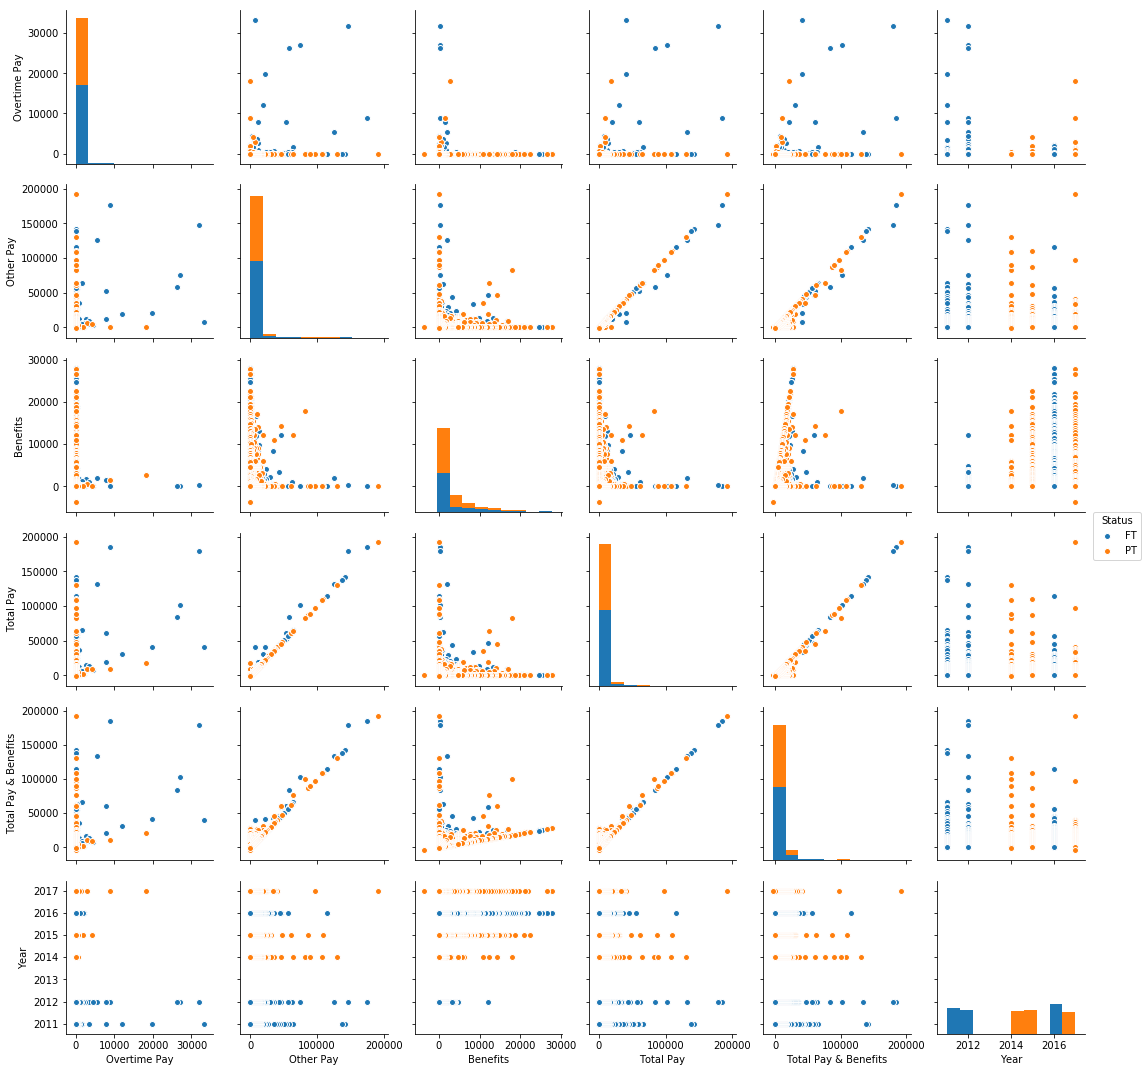

In [137]:
# printing the pairplot chart of the NoBase Pay, categorized by the employment type
sns.pairplot(noBasePay,hue='Status')

** Notes: **

From the pairplot chart above the following insights are present in employees with no Base Pay:
- There were no Part Time employees from 2011 until 2014, also in 2016.
- Part Timers relied the most on the Overtime Pay, Benefits and Other type of Pay. 
- Part timers were the highest Benefits receivers in the year 2017. 
- Other Pay was the highest contributing category of salary to Total Pay (including Benefits).

In [138]:
# creating a new dF with the mean percentage change of the salaries over the years.
noBasePay_change = noBasePay.groupby('Year').mean()[['Overtime Pay', 'Other Pay', 'Benefits',
       'Total Pay', 'Total Pay & Benefits']].pct_change()

In [139]:
# plotting the results
noBasePay_change[1:].iplot('bar',subplots=True,title='Mean Percentage Change of Employees Salaries with no Base Pay')

### Examining dataset values with negative Base Pay values

In [41]:
salaries[salaries['Base Pay']<0].nunique()

Agency                   1
Base Pay                13
Benefits                13
Employee Name           13
Job Title                4
Other Pay                2
Overtime Pay            12
Status                   2
Total Pay               13
Total Pay & Benefits    13
Year                     3
title_len                4
dtype: int64

** Notes: **
* There are 13 employees who had negative Base Pay, with 4 different Job Titles in 3 different years.

In [57]:
# printing data set of employees who has received negative Base Pay.
print(salaries[salaries['Base Pay']<0]['Job Title'].value_counts())
print('-'*10)
print(salaries[salaries['Base Pay']<0].min())

Junior Clerk               10
Clerk                       1
Custodian                   1
PS Aide Health Services     1
Name: Job Title, dtype: int64
----------
Agency                             San Francisco
Base Pay                                  -474.4
Benefits                                  -79.35
Employee Name           Carlos R Castro Santiago
Job Title                                  Clerk
Other Pay                                 -23.72
Overtime Pay                                   0
Status                                        FT
Total Pay                                -498.12
Total Pay & Benefits                     -577.47
Year                                        2012
title_len                                      5
dtype: object


** Notes: **
* Clerk's were a majority that has received negative Base Pay, within Job Title group. Particularly, Junior Clerk title holders. However, a Custodian, Carlos R Castro Santiago was at the bottom.

### Are there any negative earnings in a Total Pay & Benefits dataset column?



In [144]:
salaries[salaries['Total Pay & Benefits']<0].nunique()

Agency                   1
Base Pay                 3
Benefits                 9
Employee Name           10
Job Title                8
Other Pay                5
Overtime Pay             1
Status                   2
Total Pay                6
Total Pay & Benefits    10
Year                     5
title_len                8
dtype: int64

In [145]:
salaries[salaries['Total Pay & Benefits']<0]

,Agency,Base Pay,Benefits,Employee Name,Job Title,Other Pay,Overtime Pay,Status,Total Pay,Total Pay & Benefits,Year,title_len
37603,San Francisco,NaN,-2.73,Timothy E Gibson,Police Officer 3,0.00,0.0,FT,0.00,-2.73,2013,16
37604,San Francisco,NaN,-8.20,Mark E Laherty,Police Officer 3,0.00,0.0,FT,0.00,-8.20,2013,16
37605,San Francisco,NaN,-33.89,David P Kucia,Police Officer 3,0.00,0.0,FT,0.00,-33.89,2013,16
40967,San Francisco,0.0,-13.15,Rana Calonsag,Executive Secretary 3,1.83,0.0,FT,1.83,-11.32,2016,21
40968,San Francisco,0.0,-13.15,Bruce W Moore,IS Engineer-Journey,0.00,0.0,FT,0.00,-13.15,2016,19
40969,San Francisco,0.0,6.69,Elvira James,Secretary 2,-60.00,0.0,FT,-60.00,-53.31,2016,11
41564,San Francisco,-474.4,-79.35,Carlos R Castro Santiago,Custodian,-23.72,0.0,PT,-498.12,-577.47,2017,9
41565,San Francisco,0.0,-3628.78,Melinda R Valle,Medical Evaluations Assistant,0.00,0.0,PT,0.00,-3628.78,2017,29
39386,San Francisco,-292.4,-2.92,Lubna Kaur,PS Aide Health Services,0.00,0.0,PT,-292.40,-295.32,2015,23
38118,San Francisco,0.0,0.00,Joe Lopez,"Counselor, Log Cabin Ranch",-618.13,0.0,PT,-618.13,-618.13,2014,26


### Are there any employess that has received benefits largers than their total pays? If yes, which Job Titles they hold?

In [146]:
print('Total number of employees who has received Benefits larger than Total Pay: ',
      sum(salaries[salaries['Benefits']> salaries['Total Pay']]['Employee Name'].value_counts()))

Total number of employees who has received Benefits larger than Total Pay:  1727


In [154]:
salaries[salaries['Benefits']> salaries['Total Pay']]['Job Title'].value_counts().head(10)

Transit Operator                317
Commissioner 16.700c, No Pay    104
Deputy Sheriff                   60
Special Nurse                    39
BdComm Mbr, Grp5,M$100/Mo        37
Custodian                        36
General Laborer                  33
Parking Control Officer          33
BdComm Mbr, Grp3 M=$50/Mtg       33
Recreation Director              30
Name: Job Title, dtype: int64

### How many of them are unique Job Title holders?

In [155]:
len(salaries[salaries['Benefits']> salaries['Total Pay']]['Job Title'].value_counts())

303

### Top 5 employees with the highest Benefits where their Benefits were greater than Total Pay

In [156]:
salaries[salaries['Benefits']>salaries['Total Pay']].sort_values(by='Benefits',axis=0,ascending=False).head()

,Agency,Base Pay,Benefits,Employee Name,Job Title,Other Pay,Overtime Pay,Status,Total Pay,Total Pay & Benefits,Year,title_len
31097,San Francisco,915.0,33204.72,David G Gruber,"BdComm Mbr, Grp3 M=$50/Mtg",0.00,0.00,PT,915.00,34119.72,2015,26
30632,San Francisco,5586.2,32463.77,James H Reed,Senior Physician Specialist,558.62,0.00,PT,6144.82,38608.59,2015,27
32779,San Francisco,11281.6,30062.37,Tira L Haynes,Transit Operator,425.48,747.01,PT,12454.09,42516.46,2017,16
34148,San Francisco,700.0,28572.23,David G Gruber,"BdComm Mbr, Grp3 M=$50/Mtg",0.00,0.00,PT,700.00,29272.23,2017,26
33314,San Francisco,770.0,28080.85,David G Gruber,"BdComm Mbr, Grp3 M=$50/Mtg",0.00,0.00,FT,770.00,28850.85,2016,26


In [158]:
# Creating 2 new variables with (1) Total Pay above median; (2) Total pay below median
aboveMedian = salaries[salaries['Total Pay & Benefits']> salaries['Total Pay & Benefits'].median()]
belowMedian = salaries[salaries['Total Pay & Benefits'] < salaries['Total Pay & Benefits'].median()]

Text(0.5,1,'Below Median Total Pay Salary Correlation')

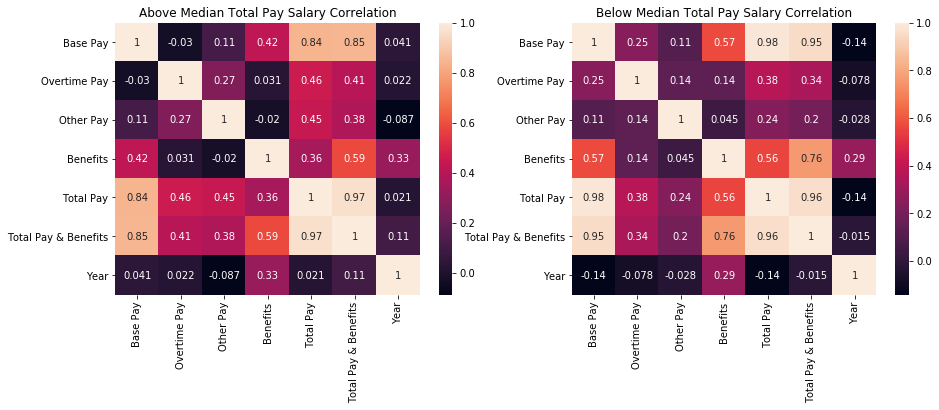

In [550]:
fig, saxis = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(aboveMedian.corr(),annot=True,ax=saxis[0]).set_title("Above Median Total Pay Salary Correlation")
sns.heatmap(belowMedian.corr(),annot=True,ax=saxis[1]).set_title("Below Median Total Pay Salary Correlation")

### How many employees had identical full name ?

In [58]:
sum(salaries['Employee Name'].value_counts() > 1)

48122

### Which are the top 20 most common employee names in the dataset?

In [162]:
salaries['Employee Name'].value_counts().head(20)

Kevin Lee                 25
Steven Lee                25
Michael Wong              21
William Wong              20
Victor Lee                20
Richard Lee               19
Amelie E Bullard          19
John Chan                 18
Michael A Johnson         16
Sandy Wong                15
Jennifer J Chiu           15
Emelita M Hathaway        15
Mary E Mays               15
Douglas R Price-Hanson    15
Georgia H Chourre         15
Stanley Lee               15
Ying F He                 15
Terrence R Marcotte       14
Besilda M Mandapat        14
Maribel Amodo             14
Name: Employee Name, dtype: int64

### Top 50 Most popular Employee Names

Text(0.5,0,'Employee Name')

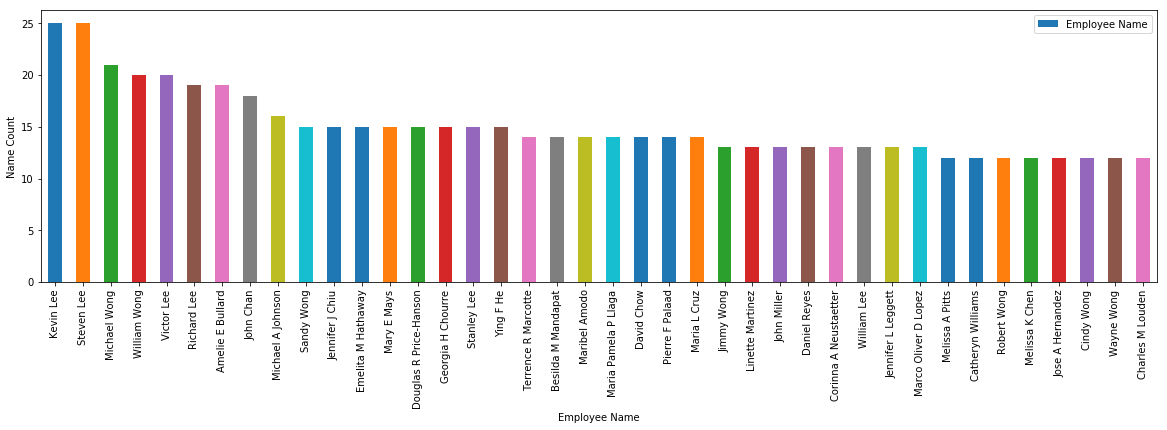

In [176]:
# plotting the bar plot
salaries['Employee Name'].value_counts().head(40).plot.bar(figsize=(20,5))

plt.legend()
plt.ylabel('Name Count')
plt.xlabel('Employee Name')

# END